In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


In [2]:
lstm_dir = '/home/work2020/yangwenhao/project/lstm_speaker_verification'

median:  805.82 mean: 1009.45 max: 8737.24 min:  266.98
median:  809.57 mean: 1032.61 max: 9560.48 min:    1.58


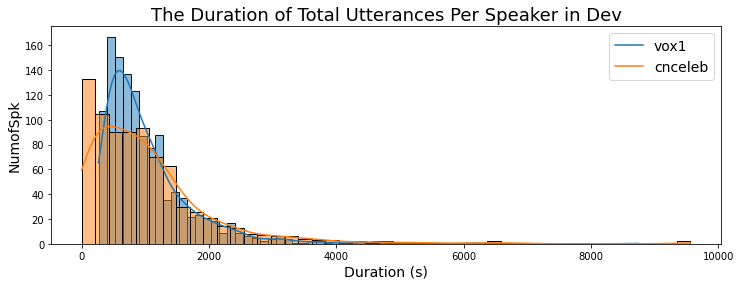

In [8]:
plt.figure(figsize=(12, 4))
plt.title("The Duration of Total Utterances Per Speaker in Dev", fontsize=18)
set_names = ['vox1', 'cnceleb']
# set_names = ['cnceleb']

for s in set_names:
    utt2num_frames_dict = {}
    with open(lstm_dir + '/data/%s/klfb/dev_fb40/utt2num_frames' % (s), 'r') as f:
        for l in f.readlines():
            uid, num_frames = l.split()
            utt2num_frames_dict[uid] = int(num_frames)

    spk2num_frames_dict = {}
    with open(lstm_dir + '/data/%s/klfb/dev_fb40/spk2utt'% (s), 'r') as f:
        for l in f.readlines():
            sid_uids = l.split()
            spk2num_frames_dict[sid_uids[0]] = 0

            for uid in sid_uids[1:]:
                spk2num_frames_dict[sid_uids[0]] += utt2num_frames_dict[uid]
    
    spks = list(spk2num_frames_dict.keys())
    spks.sort()

    num_seconds = np.array([spk2num_frames_dict[s] for s in spks])/100
    
    print("median: {:>7.2f} mean: {:>7.2f} max: {:>7.2f} min: {:>7.2f}".format(np.median(num_seconds),np.mean(num_seconds),np.max(num_seconds), np.min(num_seconds))) 
    
    sns.histplot(data=num_seconds, kde=True)
    
    # _ = plt.hist(num_seconds, bins=int(len(spks)/10), alpha=0.4)

fontsize = 14
plt.xlabel('Duration (s)', fontsize=fontsize)
plt.ylabel('NumofSpk', fontsize=fontsize)
plt.legend(set_names, fontsize=fontsize)
# num_seconds/np.median(num_seconds)

In [ ]:
cbl_0_999 = (1-0.999)/(1-0.999**(num_seconds/2))
plt.plot((1-0.999)/(1-0.999**(num_seconds/2)), alpha=0.3)
print(cbl_0_999.min(), cbl_0_999.max())

cbl_0_99 = (1-0.99)/(1-0.99**(num_seconds/2))
plt.plot((1-0.99)/(1-0.99**(num_seconds/2)), alpha=0.3)
print(cbl_0_99.min(), cbl_0_99.max())
cbl_0_99

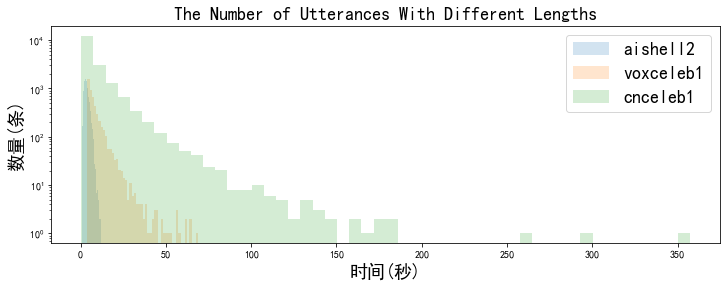

In [24]:
test_paths = ['/data/aishell2/spect/test_log/utt2dur', '/data/vox1/klfb/test_fb40/utt2dur', '/data/cnceleb/klfb/test_fb40/utt2dur']
plt.figure(figsize=(12, 4))
plt.title("The Number of Utterances With Different Lengths", fontsize=18)

for test_path in test_paths:
    utt2dur_file = lstm_dir + test_path

    utt2dur = []
    with open(utt2dur_file, 'r') as f:
        for l in f.readlines():
            uid, dur = l.split()
            utt2dur.append([uid, float(dur)])

    dur = np.array([x[1] for x in utt2dur])
    plt.hist(dur, bins=50, log=True, alpha=0.2)        

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)', fontsize=18)
plt.ylabel(u'数量(条)', fontsize=18)
plt.legend(['aishell2', 'voxceleb1', 'cnceleb1'], fontsize=18)
# plt.title

In [7]:
utt2dur_file = lstm_dir + '/data/cnceleb/klfb/dev_fb40/utt2dur'
dom2dur = {}
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        domain = uid.split('-')[1]
        dur = float(dur)
        if domain not in dom2dur:
            dom2dur[domain] = dur
        else:
            dom2dur[domain] += dur

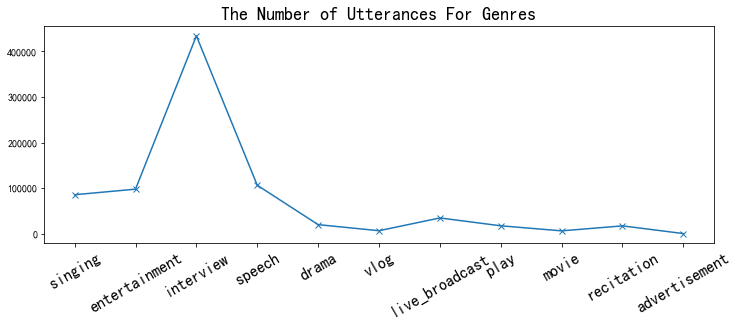

In [25]:
plt.figure(figsize=(12, 4))
plt.title("The Number of Utterances For Genres", fontsize=18)

domains = []
durations = []
for d in dom2dur:
    domains.append(d)
    durations.append(dom2dur[d])

plt.plot(durations, marker='x')
_ = plt.xticks(np.arange(11), domains, rotation=30, fontsize=16)

In [9]:
all_frames = 0
easy_dom = 0
for dom in dom2dur:
    all_frames += dom2dur[dom]
    if dom in ['recitation', 'live_broadcast', 'speech', 'vlog']:
        easy_dom += dom2dur[dom]
        
print(easy_dom/all_frames)

0.20011082561311117


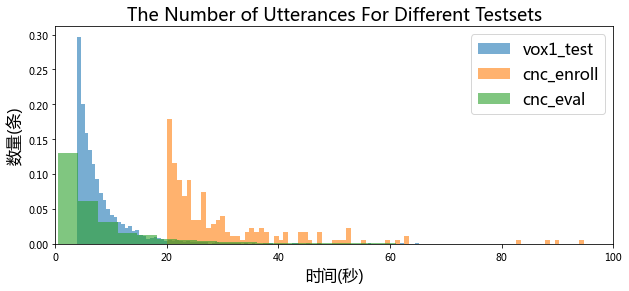

In [26]:
vox1_test_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/vox1/klfb/test_fb40/utt2dur'
# utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/utt2dur'
cnc_enroll_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/enroll/reco2dur'
cnc_eval_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/eval/utt2dur'

utt2dur_files = [vox1_test_utt2dur_file, cnc_enroll_utt2dur_file, cnc_eval_utt2dur_file]
utt2dur_set = ['vox1_test', 'cnc_enroll', 'cnc_eval']

plt.figure(figsize=(10, 4))
plt.title("The Number of Utterances For Different Testsets", fontsize=18)

for i,utt2dur_file in enumerate(utt2dur_files):
    utt2dur = []
    with open(utt2dur_file, 'r') as f:
        for l in f.readlines():
            uid, dur = l.split()
            utt2dur.append([uid, float(dur)])

    dur = np.array([x[1] for x in utt2dur])
    # sup = plt.subplot(len(utt2dur_files),1, i+1)
    plt.hist(dur, bins=100, density=True, alpha=0.6) 
    # sup.legend([utt2dur_set[i]])
    
plt.xlim(0, 100)
plt.legend(utt2dur_set, fontsize=16)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
_ = plt.xlabel(u'时间(秒)', fontsize=16)
_ = plt.ylabel(u'数量(条)', fontsize=16)

In [33]:
cnc_test_trials_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/trials'
utt2dur = []
del_utts = set()
min_len=4.0
# max_len=4.0
new_trials = cnc_test_trials_file+'max'+str(min_len)
with open(cnc_eval_utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        if float(dur)>=min_len:
            del_utts.add(uid)
        
residual_trials = 0
with open(cnc_test_trials_file, 'r') as f1:
    if os.path.exists(new_trials):
        os.remove(new_trials)
        print('rm %s' % new_trials)
    with open(new_trials, 'w') as f2:
        for l in f1.readlines():
            uid_a, uid_b, dur = l.split()
            
            if uid_b not in del_utts:
                f2.write(l)
                residual_trials += 1
                
print('num of residual_trials is %d' % residual_trials)

rm /home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/trialsmax4.0
num of residual_trials is 1668200


(0.0, 40.0)

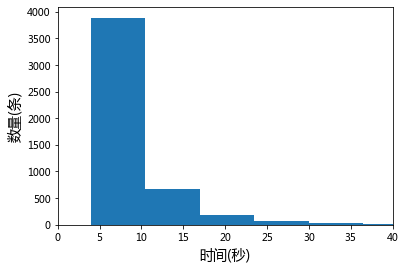

In [21]:
utt2dur_file = '/home/ssd2020/yangwenhao/lstm_speaker_verification/data/vox1/klsp/test/utt2dur'
utt2dur = []
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        
dur = np.array([x[1] for x in utt2dur])
plt.hist(dur, bins=10)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)', fontsize=14)
plt.ylabel(u'数量(条)', fontsize=14)
plt.xlim(0, 40)

In [14]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
LiSu
Droid Sans Fallback
Microsoft YaHei
Yahei Mono
YouYuan
KaiTi
FangSong
SimHei
YaHei Consolas Hybrid


In [13]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/yangwenhao/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
import kaldi_io

a1 = '/home/yangwenhao/local/project/lstm_speaker_verification/data/cnceleb/klfb/fbank/dev_fb40/raw_fbank_dev_fb40.1.ark:23'
a1_np = kaldi_io.read_mat(a1)

a2 = '/home/yangwenhao/local/project/lstm_speaker_verification/data/cnceleb/klfb/fbank/dev_fb40/raw_fbank_dev_fb40.1.ark:110357'
a2_np = kaldi_io.read_mat(a2)

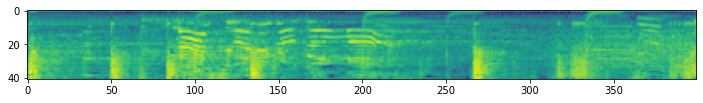

In [9]:
plt.figure(figsize=(12, 8))
plt.imshow(a1_np[:400].T)

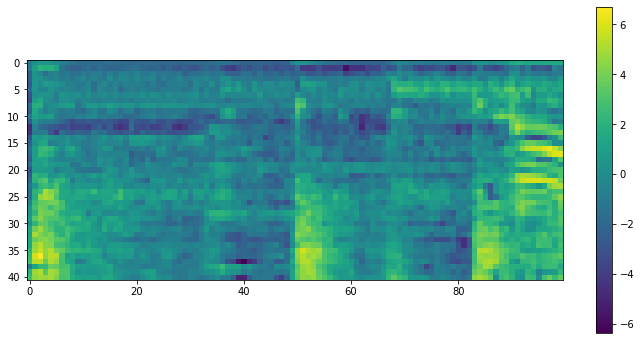

In [26]:
plt.figure(figsize=(12, 6))

im = plt.imshow((a1_np-a1_np.mean(axis=0))[:100].T)
cb = plt.colorbar(im)

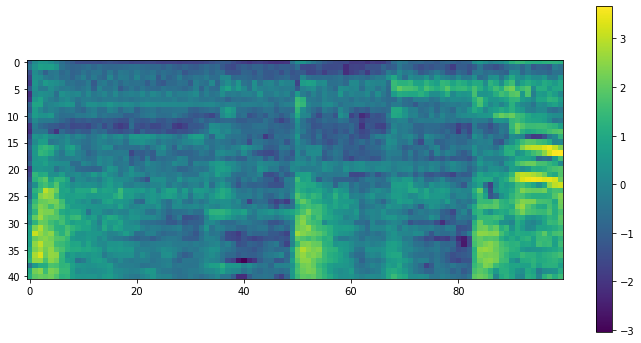

In [25]:
plt.figure(figsize=(12, 6))

im = plt.imshow(((a1_np-a1_np.mean(axis=0))/np.std(a1_np,axis=0))[:100].T)
cb = plt.colorbar(im)

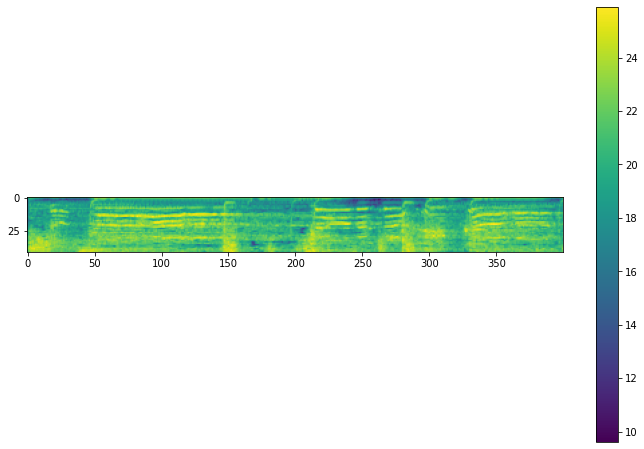

In [18]:
plt.figure(figsize=(12, 8))
im = plt.imshow(a2_np[:400].T)
cb = plt.colorbar(im)